# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [17]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-03-27 05:13:41--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat.1’

notMNIST_small.mat. 100%[===================>] 112.14M  63.5MB/s    in 1.8s    

2023-03-27 05:13:43 (63.5 MB/s) - ‘notMNIST_small.mat.1’ saved [117586976/117586976]



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

## Data Loading

In [19]:
data = io.loadmat('notMNIST_small.mat')

In [20]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

* transform data

In [21]:
x = data['images']
y = data['labels']

In [22]:
x.shape

(28, 28, 18724)

In [23]:
x_trans = np.transpose(x, (2, 0, 1))

In [24]:
print( x.shape )
print( x_trans.shape )

(28, 28, 18724)
(18724, 28, 28)


In [25]:
x = np.transpose(x, (2, 0, 1))

* x, y 타입 변환

In [26]:
y = y.astype('int32')
x = x.astype('float32') #/ 255.

* reshape

    - reshape.(sample, x, y, channel) 순서

In [27]:
resolution = 28

x = x.reshape((-1, resolution, resolution, 1))
x.shape

(18724, 28, 28, 1)

* 랜덤하게 문자 시각화

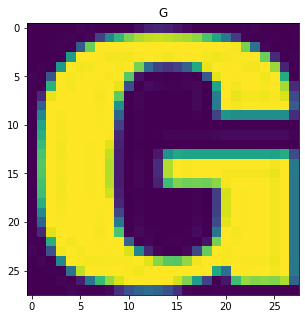

In [28]:
# looking at data; some fonts are strange
rand_n = np.random.randint(0, 18723)

plt.figure(figsize=(5,5))
plt.title( "ABCDEFGHIJ"[y[rand_n]] )
plt.imshow( x[rand_n, :, :, 0])
plt.show()

* 랜덤하게 여러 문자 시각화

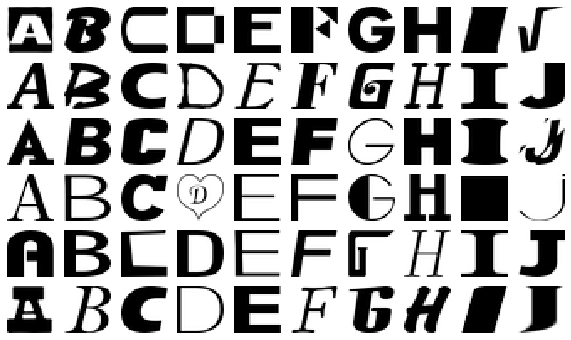

In [29]:
# random letters
classes = 10
rows = 6

fig, axs = plt.subplots(rows, classes, figsize=(classes, rows))

for letter_id in range(10):
    letters = x[ y==letter_id ]

    for i in range(rows):
        ax = axs[i, letter_id]
        ax.imshow(letters[np.random.randint(len(letters)), :, :, 0],
                  cmap='Greys', interpolation='none')
        ax.axis('off')

* train set / validation set / test set 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023)

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((11983, 28, 28, 1), (11983,), (2996, 28, 28, 1), (2996,))

## X : Min-Max Scaling

In [31]:

x_min, x_max = x_train.min(), x_train.max()

x_train = (x_train - x_min)/(x_max-x_min)
x_val = (x_val - x_min)/(x_max-x_min)
x_test = (x_test - x_min)/(x_max-x_min)
                           

## Y : One-Hot Encoding

In [46]:
class_n = len(np.unique(y_train))

from tensorflow.keras.utils import to_categorical


y_train =to_categorical(y_train, class_n)
y_val =to_categorical(y_val, class_n)

x_train.shape, y_train.shape

((11983, 28, 28, 1), (11983, 10))

## **Data Augmentation**

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
# 데이터 제너레이터를 선언함!  제너레이팅 규칙과 함께!
trainIDG = ImageDataGenerator(rescale=1./255,
                              zca_whitening=True,     # apply ZCA whitening
                              rotation_range=30,      # 0~20 사이로 랜덤하게 이미지 각도를 비틈
                              zoom_range = 0.2,       # 랜덤하게 확대
                              width_shift_range=0.1,  # 너비가 이동
                              height_shift_range=0.1, # 높이가 이동
                              horizontal_flip=True,   #  
                              vertical_flip=True)     # 

# 어떤 데이터를 바탕으로 제너레이팅 할 것인지, 미리 알려줌!
# 옵션에 따라 필요할 수도 있고 그렇지 않을 수 있다.
trainIDG.fit(x_train)

# 학습 할 때마다, '실시간'으로 데이터를 생성하여 학습에 활용하고, 버리고를 반복할 준비!
flow_trainIDG = trainIDG.flow(x_train, y_train, batch_size=32)

In [41]:
valIDG = ImageDataGenerator(rescale=1./255)

flow_valIDG = valIDG.flow(x_val, y_val, batch_size=32)

## Keras로 자유롭게 CNN 모델링

1. [이 구조를 미니 버전으로 활용해봐도 좋다](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
2. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
3. 컨컨컨풀 컨컨컨풀 컨컨컨풀은 어떠한가!

In [43]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential

## Early Stopping을 이용한 학습

위의 코드를 참고하여, 5 epoch 전보다 val_loss가 개선되지 않았으면 멈추는 얼리 스토핑 모델링을 하시오.

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', # 관측대상 : 무엇을 보고 얼리스토핑을 할지
patience = 5,
min_delta = 0,
verbose = 1,
restore_best_weights =True)

In [47]:
x_train.shape, y_train.shape

((11983, 28, 28, 1), (11983, 10))

In [51]:
clear_session()

model = Sequential([Input(shape=(28,28,1)),
                    
                    Conv2D(
                    filters = 32,
                    kernel_size=3,
                    padding='same',
                    activation='relu'),

                    Conv2D(
                    filters =32,
                    kernel_size=3, 
                    padding='same',
                    activation='relu'),
                    MaxPool2D(pool_size=2, strides=2),
                      BatchNormalization(),
                    Dropout(0.25),

                    Conv2D(
                    filters = 64,
                    kernel_size=3,
                    padding='same',
                    activation='relu'),

                    Conv2D(
                    filters =64,
                    kernel_size=3, 
                    padding='same',
                    activation='relu'),
                    MaxPool2D(pool_size=2, strides=2),
                    BatchNormalization(),
                    Dropout(0.25),


                    Flatten(),
                    Dense(10, activation='softmax')

])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', # 관측대상 : 무엇을 보고 얼리스토핑을 할지
patience = 5,
min_delta = 0,
verbose = 1,
restore_best_weights =True)

In [ ]:
flow_trainIDG = trainIDG.flow(x_train, y_train, batch_size=32)

model.fit(flow_trainIDG, validation_data = flow_trainIDG, epochs = 1000, verbose=1, callbacks = [es])

Epoch 1/1000
375/375 [==============================] - 56s 118ms/step - loss: 1.6342 - accuracy: 0.4992 - val_loss: 1.2823 - val_accuracy: 0.5802
Epoch 2/1000
375/375 [==============================] - 35s 93ms/step - loss: 1.1402 - accuracy: 0.6490 - val_loss: 1.0987 - val_accuracy: 0.6762
Epoch 3/1000
375/375 [==============================] - 40s 107ms/step - loss: 0.9815 - accuracy: 0.6957 - val_loss: 0.8880 - val_accuracy: 0.7319
Epoch 4/1000
375/375 [==============================] - 38s 101ms/step - loss: 0.8810 - accuracy: 0.7295 - val_loss: 0.8009 - val_accuracy: 0.7520
Epoch 5/1000
375/375 [==============================] - 35s 94ms/step - loss: 0.8229 - accuracy: 0.7471 - val_loss: 0.8312 - val_accuracy: 0.7437
Epoch 6/1000
375/375 [==============================] - 36s 95ms/step - loss: 0.7889 - accuracy: 0.7560 - val_loss: 0.7267 - val_accuracy: 0.7733
Epoch 7/1000
375/375 [==============================] - 27s 73ms/step - loss: 0.7488 - accuracy: 0.7676 - val_loss: 0.677

* 예측값 생성

In [ ]:
y_pred = model.predict(x_val)

y_pred.shape

* 생성한 예측값을 y_test 구조와 같게 만든다

In [ ]:
pred_array = np.zeros(shape=(y_pred.shape[0], y_pred.shape[1]))
idx = 0

for arr_val in y_pred :
    # print(arr_val)
    pred_array[idx][arr_val.argmax()] = 1
    idx += 1

In [ ]:
pred_array.shape

* 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print( f'{accuracy_score(y_test, pred_array):.4f}' )

## 문자 이미지 시각화

In [ ]:
import random as rd

In [ ]:
character = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}

* 실제 성능 확인을 위해 반복 실행!

In [ ]:
rand_n = rd.randrange(0, 3744)

print(f'id = {rand_n}')
print(f'실제 문자 : {character[y_val[rand_n].argmax()]}')
print(f'모델의 문자 예측 : {character[y_pred[rand_n].argmax()]}' )
print(f'모델의 문자별 예측 확률 : {np.round(y_pred[rand_n]*100)}')
# print(f'모델의 문자들 총 확률 : {sum(np.round(y_pred[rand_n]*100))}')

print('====================================================')

if y_test[rand_n].argmax() == y_pred[rand_n].argmax() :
    print('정답')
else :
    print('오답')

print('====================================================')

plt.figure(figsize=(5,5))
plt.imshow(x_test[rand_n].reshape(28, 28), cmap='gray')
plt.title("ABCDEFGHIJ"[y_val[rand_n].argmax()] )
plt.show()

* 틀린 문자만 확인해봅시다!

In [ ]:
t_f = ( y_test.argmax(axis=1) == y_pred.argmax(axis=1) )
false_id = np.where(t_f==False)[0]
false_n = len(false_id)

id = false_id[rd.randrange(0, false_n)]

print(f'id = {id}')
print(f'실제 문자 : {character[y_test[id].argmax()]}')
print(f'모델의 문자 예측 : {character[y_pred[id].argmax()]}' )
print(f'모델의 문자별 예측 확률 : {np.round(y_pred[id]*100)}')
# print(f'모델의 문자들 총 확률 : {sum(np.round(y_pred[rand_n]*100))}')

print('====================================================')

if y_test[id].argmax() == y_pred[id].argmax() :
    print('정답')
else :
    print('오답')

print('====================================================')

plt.figure(figsize=(5,5))
plt.imshow(x_test[id].reshape(28, 28), cmap='gray')
plt.title("ABCDEFGHIJ"[y_pred[id].argmax()] )
plt.show()